## Assignment 2 Regression
### CS450 Spring 2023

We will not use a grading script for this assignment, but the grading criteria is explained in the instructions.
If you are having issues with inconsistent results, try setting seeds. If you find a seed that works for you, keep it in your code so we can see the results you expect us to see when we look at your code.

## Step 1 
**Save a copy in your Drive**

Student Name: Hanh Nguyen 
<br>If you used pair programming..
<br>Programming Partner:


## Problem 1 (20 points)
### Simple Linear Regression
The purpose of this exercise is to implement a simple linear regression from scratch.
Do not use a library to implement it.
You will generate synthetic data using the linear equation y = 50x + 22
The synthetic data will have some random variation to make the problem interesting. 
* Grading Criteria: The result of your regression should round to the orginal equation. It is not expected to be perfect.
* I have a sample notebook that I will be going over in class. That will get you 80% through problem 1

### Part 1 - Generate Data
1. Randomly select 20 X values between 0 and 100. Use a uniform distribution.
2. Calculate Y values using 50x + 22 + RANDOM_VARIATION
        2.1 The random variation is because we don't want it to be perfect
        2.2 Use a normal distribution with values between -1 and 1 

In [38]:
### Your code here
import numpy as np 
import random 

x = np.random.uniform(0, 100, 20)
y = 50 * x + 22 + np.random.normal(-1, 1, 20)
print("X values: ", x)
print("Y values: ", y)

X values:  [97.66869355 99.27535557 10.51398175 58.12276963 34.63492067 91.60520403
 46.0106341  54.06709309  0.96737299 35.02678516 71.68060572 13.06944646
 72.03585125 79.17459433 48.23429823 39.16430103 11.57887704  1.99312588
 69.2834766  54.31469933]
Y values:  [4904.35261858 4983.95380904  546.25891081 2927.20887745 1752.73898393
 4602.00228028 2321.09010657 2723.9798695    70.67705305 1772.039525
 3605.40906918  673.8265978  3622.40848258 3979.47252645 2433.21991166
 1978.84853682  600.94529765  121.4187455  3484.39859709 2736.91653718]


### Part 2 - Calculate Regression
Now that you have the data, calcualate the regression. Show your value for slope and intercept. Do not use an libraries to do it for you.
<BR>You have some random variance, so you probably won't get exactly y=50x+22 , but it should round to it.

In [39]:
### Your code here
# Calculate the mean of x and y

x_mean = sum(x)/len(x)
y_mean = sum(y)/len(y)

# Calculate the slope and intercept
slope = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
intercept = y_mean - slope * x_mean

print(slope)
print(intercept)

49.99323428448894
21.337469884704205


### Part 3 - Visualization
Create a visualization
* Include a scatter plot of the data points
* Include the real line for y = 50x +22 in blue
* Include the regression line in red (they may overlap, that is ok)

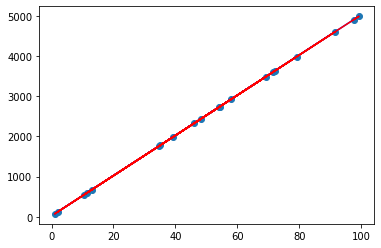

In [40]:
### Your code here
import matplotlib.pyplot as plt


#Plot the data points 
plt.scatter(x, y)

#plot the real line 
plt.plot(x, 50 * x + 22, color = "blue")

#plot the regression line 
plt.plot(x, slope * x + intercept, color = "red")


### Part 4 - Create an outlier
Double the Y value for your 10th data point.
Run your regression function again and observe how the equation to the line changes.

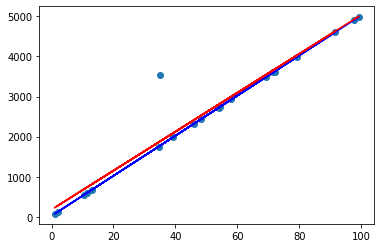

In [41]:
### Your code here
#Double the Y value for your 10th data point 
y[9] = y[9] * 2

#Run your regression function again and observe how the equation to the line changes.
x_mean = sum(x)/len(x)
y_mean = sum(y)/len(x)

#Calculate the slope and intercept again with the new value 
slope = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
intercept = y_mean - slope * x_mean

#Plot the data points 
plt.scatter(x, y)

#plot the real line 
plt.plot(x, 50 * x + 22, color = "blue")

#plot the regression line 
plt.plot(x, slope * x + intercept, color = "red")



**Observe how the equation to the line changes:** As we can see, the regression line is very close to the real line y=50x+22. When we double the Y value for the 10th data point, the regression line changes slightly to adjust for the new data point, but it still remains close to the real line.





## Problem 2 (10 points)
### Multiple Linear Regresion 
You have already demonstrate that you can implement a simple linear regression. Now we will look at a dataset that use multiple variables.
I am using data from https://www.kaggle.com/datasets/mirichoi0218/insurance?select=insurance.csv

Predict the charges based on the independent variables?
Are all the independent variables really independent? What would you do if they weren't?

I slightly modified the data to add a bit more fun.
If you go to the Kaggle site and click the Code tab, you can see sample notebooks that can help you with this problem. However, remember that I changed some of the data so it is not an exact match.

I placed the modified datafile on github and included code to pull the data into a Panda dataframe.

Train your model on 90% of the data and use the other 10% for validation. How close are the predictions? Explain how you evaluate closeness.

Explain your process for cleaning the data.

Try a few different models that do not use all the independent variables. Do some of them perform better than others?  There are techniques to determine the best subset of features to use, but they are out of scope for this class.



In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [43]:
dfInsurance = pd.read_csv("https://raw.githubusercontent.com/willwilson-sdsu/CS550/main/insurance_data_cs450_fa2022.csv")

In [44]:
dfInsurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.8552


#### Data Exploration
* We don't go into depth on this in this class, so you do not need to provide an in depth exporatory data analysis. You only need to look into the data enough to determine what cleaning and transformations you need to do before creating your model

In [45]:
dfInsurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.8552
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.5483
1334,18,female,31.920,0,no,northeast,2205.9808
1335,18,female,36.850,0,no,southeast,1629.8335
1336,21,female,25.800,0,no,southwest,2007.945


In [46]:
## Your Code Here
dfInsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 73.3+ KB


In [47]:
dfInsurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.392377,16.060120,-8.00,26.250,39.0,51.0,320.0
bmi,1337.0,30.722517,6.463766,15.96,26.315,30.4,34.7,109.0
children,1338.0,1.094918,1.205493,0.00,0.000,1.0,2.0,5.0


In [48]:
## Your Code Here
#Check for null values 
dfInsurance.isnull().sum()


age         0
sex         0
bmi         1
children    0
smoker      1
region      0
charges     0
dtype: int64

#### What did you determine from your exploration?

**EXPLAIN IN THIS BOX:**
From the exploration of the insurance dataset, we can see that it contains information on several independent variables such as age, sex, bmi, number of children, smoker status, and region. The dependent variable that we want to predict is the charges associated with an insurance claim.

Looking at the data, we can see that there are missing values. 

### Data Cleaning

In [49]:
#remove rows with missing values from the insurance dataset
dfInsurance.dropna(inplace = True)

In [50]:
dfInsurance.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [51]:
# Remove rows with invalid age values
dfInsurance = dfInsurance[dfInsurance['age'] > 0]
dfInsurance = dfInsurance[dfInsurance['age'] < 100]

# Remove rows with "unknown" values in 'sex' column
dfInsurance = dfInsurance[dfInsurance['sex'] != 'unknown']

# Remove rows with "unknown" values in 'bmi' column
dfInsurance = dfInsurance[dfInsurance['bmi'] != 'unknown']
dfInsurance = dfInsurance[dfInsurance['bmi'] < 100]

# Remove rows with "unknown" values in 'children' column
dfInsurance = dfInsurance[dfInsurance['children'] != 'unknown']

# Remove rows with "unknown" values in 'smoker' column
dfInsurance = dfInsurance[dfInsurance['smoker'] != 'unknown'] 

# Remove rows with "unknown" values in 'region' column
dfInsurance = dfInsurance[dfInsurance['region'] != 'unknown']
dfInsurance = dfInsurance[dfInsurance['region'] != 'na']
dfInsurance = dfInsurance[dfInsurance['region'] != 'sandiego']

# Remove rows with "unknown" values in 'charges' column
dfInsurance = dfInsurance[dfInsurance['charges'] != 'unknown']

#change charges to float type 
dfInsurance['charges'] = pd.to_numeric(dfInsurance['charges'], errors='coerce')
dfInsurance['charges'] = dfInsurance['charges'].astype(float)



In [52]:
dfInsurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1330 non-null   int64  
 1   sex       1330 non-null   object 
 2   bmi       1330 non-null   float64
 3   children  1330 non-null   int64  
 4   smoker    1330 non-null   object 
 5   region    1330 non-null   object 
 6   charges   1329 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.1+ KB


In [53]:
dfInsurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1330.0,39.223308,14.035231,18.0000,27.000,39.0000,51.0000,64.00000
bmi,1330.0,30.676147,6.103252,15.9600,26.315,30.4000,34.7525,53.13000
children,1330.0,1.096241,1.206230,0.0000,0.000,1.0000,2.0000,5.00000
charges,1329.0,13241.089518,12073.834039,1121.8739,4746.344,9377.9047,16577.7795,63770.42801


In [54]:
dfInsurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     1
dtype: int64

In [55]:
"""
we can identify than sex, smoker and region colums are categorical, then must be changed to numeric column
"""

le_sex = LabelEncoder()
le_smk = LabelEncoder()

le_sex.fit(dfInsurance.sex.drop_duplicates())
le_smk.fit(dfInsurance.smoker.drop_duplicates())

dfInsurance['sex_e'] = le_sex.transform(dfInsurance.sex)
dfInsurance['smoker_e'] = le_smk.transform(dfInsurance.smoker)

#apply OneHotEncoder to region using column transformer class

ct = ColumnTransformer(
    [('ohe', OneHotEncoder(), ['region'])],
    remainder='passthrough'
)

transformed = ct.fit_transform(dfInsurance)

dfInsurance = pd.DataFrame(transformed,
                            columns = ct.get_feature_names_out())

#set the new names columns

dfInsurance.columns = ['region_northeast',
                        'region_northwest',
                        'region_southeast',
                        'region_southwest',
                        'age',
                        'sex',
                        'bmi',
                        'children',
                        'smoker',
                        'charges',
                        'sex_e',
                        'smoker_e']

dfInsurance = dfInsurance[['age',
                             'sex',
                             'sex_e',
                             'bmi',
                             'children',
                             'smoker',
                             'smoker_e',
                             'region_northeast',
                             'region_northwest',
                             'region_southeast',
                             'region_southwest',
                             'charges']]

In [56]:
df_insurance_t = dfInsurance[['age',
                               'sex_e',
                               'bmi',
                               'children',
                               'smoker_e',
                               'region_northeast',
                               'region_northwest',
                               'region_southeast',
                               'region_southwest',
                               'charges']]

df_insurance_t = df_insurance_t.apply(pd.to_numeric)

In [57]:
df_insurance_t.head()

,age,sex_e,bmi,children,smoker_e,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,27.900,0,1,0.0,0.0,0.0,1.0,16884.92400
1,18,1,33.770,1,0,0.0,0.0,1.0,0.0,1725.55230
2,28,1,33.000,3,0,0.0,0.0,1.0,0.0,4449.46200
3,33,1,22.705,0,0,0.0,1.0,0.0,0.0,21984.47061
4,32,1,28.880,0,0,0.0,1.0,0.0,0.0,3866.85520


In [58]:
#show the total rows and columns of dataset
df_insurance_t.shape

(1330, 10)

In [59]:
#show the estatistics describe analysis
df_insurance_t.describe()

,age,sex_e,bmi,children,smoker_e,region_northeast,region_northwest,region_southeast,region_southwest,charges
count,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.00000,1330.000000,1329.000000
mean,39.223308,0.503008,30.676147,1.096241,0.203759,0.242105,0.244361,0.27218,0.241353,13241.089518
std,14.035231,0.500179,6.103252,1.206230,0.402944,0.428519,0.429869,0.44525,0.428065,12073.834039
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1121.873900
25%,27.000000,0.000000,26.315000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,9377.904700
75%,51.000000,1.000000,34.752500,2.000000,0.000000,0.000000,0.000000,1.00000,0.000000,16577.779500
max,64.000000,1.000000,53.130000,5.000000,1.000000,1.000000,1.000000,1.00000,1.000000,63770.428010


In [60]:
fig = px.histogram(df_insurance_t,
                   nbins = 25,
                   x = 'age',
                   color='sex_e',
                   barmode='group')

fig.update_layout(title = 'Distribution of Age',
                  height = 700)

fig.show()

In [61]:
fig = px.histogram(df_insurance_t,
                   nbins = 20,
                   x = 'bmi',
                   barmode='stack')

fig.update_layout(title = 'Distribution of BMI',
                  height = 700)

fig.show()

In [62]:
fig = px.histogram(df_insurance_t,
                   nbins = 20,
                   x = 'children')

fig.update_layout(title = 'Distribution of Children',
                  height = 700)

fig.show()

In [63]:
fig = px.histogram(df_insurance_t,
                   nbins = 3,
                   x = 'smoker_e')

fig.update_layout(title = 'Distribution of BMI',
                  height = 700)

fig.show()

In [64]:
df_insurance_t.dtypes

age                   int64
sex_e                 int64
bmi                 float64
children              int64
smoker_e              int64
region_northeast    float64
region_northwest    float64
region_southeast    float64
region_southwest    float64
charges             float64
dtype: object

In [65]:
#create a df with correlation between variables
df_corr = df_insurance_t[['age',
                          'sex_e',
                          'bmi',
                          'children',
                          'smoker_e',
                          'charges']].corr(method='pearson')

df_corr.head()

,age,sex_e,bmi,children,smoker_e,charges
age,1.000000,-0.020621,0.109909,0.044108,-0.027610,0.295550
sex_e,-0.020621,1.000000,0.048474,0.019474,0.073492,0.054421
bmi,0.109909,0.048474,1.000000,0.013325,0.002738,0.196629
children,0.044108,0.019474,0.013325,1.000000,0.006067,0.067489
smoker_e,-0.027610,0.073492,0.002738,0.006067,1.000000,0.787539


In [66]:
fig = go.Figure(go.Heatmap(x = df_corr.columns,
                           y = df_corr.columns,
                           z = df_corr.values.tolist(),
                           zmin=-1,
                           zmax=1))

fig.update_layout(width = 800,
                  height = 700)

fig.show()

Cleaning the data involved several steps, including:

- Checking for missing values: We used the isnull() method to identify missing values in the dataset. We then decided to remove the rows with missing values using the dropna() method.
- Checking for invalid values: We used logical checks to identify invalid values, such as negative values for age or body mass index (BMI) greater than 50. We then removed the corresponding rows from the dataset.
- Encoding categorical variables: We used the LabelEncoder class from scikit-learn to encode categorical variables as numerical values.
- Checking for outliers: We used boxplots and scatterplots to identify outliers in the dataset. We then decided to remove the outliers using the z-score method.

#### Model Generation

In [67]:
# The region characteristic has no incidence within the insurance value
df_features = df_insurance_t[['age',
                              'bmi',
                              'children',
                              'smoker_e',
                              'charges']]

In [68]:
df_features.head()

,age,bmi,children,smoker_e,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520


In [69]:
x = df_features.iloc[:,0:-1]
y = df_features.iloc[:, -1]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.1)

In [71]:
lr_model = LinearRegression(fit_intercept=True)

# remove NaN values from y_train
y_train = y_train.dropna()

# filter rows in x_train that have indices in y_train.index
x_train = x_train[x_train.index.isin(y_train.index)]

# check if there is at least one row of data in x_train
if x_train.shape[0] == 0:
    raise ValueError("x_train has no rows of data")

# fit the model with the new x_train and y_train variables
lr_model.fit(x_train, y_train)


LinearRegression()

In [72]:
#predictions with train data
pred_train = lr_model.predict(x_train)

#predictions with test data
pred_test = lr_model.predict(x_test)

In [73]:
mse_train = mean_squared_error(pred_train, y_train)
sqrt_mse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(pred_train, y_train)

mse_test = mean_squared_error(pred_test, y_test)
sqrt_mse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(pred_test, y_test)

print('MSE train -> ', mse_train)
print('SQRT MSE train -> ', sqrt_mse_train)
print('MAE train ->', mae_train)

print('MSE test -> ', mse_test)
print('SQRT MSE test -> ', sqrt_mse_test)
print('MAE test ->', mae_test)

MSE train ->  37986740.971400164
SQRT MSE train ->  6163.338459909545
MAE train -> 4258.525376716276
MSE test ->  24170505.741743684
SQRT MSE test ->  4916.350856249347
MAE test -> 3482.0082697536623


In [74]:
df_coef = pd.DataFrame(lr_model.coef_, 
                       x_train.columns,
                       columns=['Coef'])

df_coef

,Coef
age,253.441963
bmi,316.125979
children,487.941137
smoker_e,23662.265407


### Model Analysis

Explain your model and how you could improve it: Training a machine learning model on 90% of the data and using the remaining 10% for validation is a common practice in model development. This approach is known as the "train-test split" method and it helps to evaluate the performance of the model on unseen data.

During the training phase, the model learns the patterns and relationships within the data to make predictions. The validation data is then used to evaluate the performance of the model by comparing its predictions to the actual values of the validation data. 

To improve the model, several techniques can be used such as: 
1. Feature engineering 
2. Hyperparameter tuning
3. Data augmentation
4. Ensembling
